# Covid-19 infección en Ecuador. Modelos matemáticos y predicciones
Una comparación de modelos, lineal, polilnomico,logísticos y exponenciales aplicados a la infección por el virus Covid-19

Se realiza un análisis matemático simple del crecimiento de la infección en Python y dos modelos para comprender mejor la evolución de la infección.

Se crea modelos de series temporales del número total de personas infectadas hasta la fecha (es decir, las personas realmente infectadas más las personas que han sido infectadas). Estos modelos tienen parámetros , que se estimarán por ajuste de curva.

In [1]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline


Imprimimos los datos obtenidos de la siguinet paguina, nos da los datos mundiales pero solo filtre los de ecuador 

https://data.europa.eu/euodp/es/data/dataset/covid-19-coronavirus-data

In [2]:
# Actualizar los datos (URL)

url = 'https://raw.githubusercontent.com/agustin-XP/SimulacionCuaderno/master/covisd.csv'

df = pd.read_csv(url)
print(df)

       dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0   29/02/2020   29      2  2020      0       0                 Ecuador    EC   
1   01/03/2020    1      3  2020      1       0                 Ecuador    EC   
2   02/03/2020    2      3  2020      5       0                 Ecuador    EC   
3   03/03/2020    3      3  2020      1       0                 Ecuador    EC   
4   05/03/2020    5      3  2020      3       0                 Ecuador    EC   
5   06/03/2020    6      3  2020      3       0                 Ecuador    EC   
6   09/03/2020    9      3  2020      1       0                 Ecuador    EC   
7   10/03/2020   10      3  2020      1       0                 Ecuador    EC   
8   11/03/2020   11      3  2020      2       0                 Ecuador    EC   
9   14/03/2020   14      3  2020      6       1                 Ecuador    EC   
10  15/03/2020   15      3  2020      5       1                 Ecuador    EC   
11  16/03/2020   16      3  

Filtro los datos que son requerio en este caso son el dia y el total de infectados 


In [3]:
df = df.loc[:,['incre','casosT']]
print(df)

    incre  casosT
0       1       0
1       2       1
2       3       6
3       4       7
4       5      10
5       6      13
6       7      14
7       8      15
8       9      17
9      10      23
10     11      28
11     12      37
12     13      58
13     14     111
14     15     168
15     16     199
16     17     426
17     18     532
18     19     789
19     20     981
20     21    1082
21     22    1211
22     23    1403
23     24    1627
24     25    1835
25     26    1890
26     27    1966
27     28    2302
28     29    2758
29     30    3163
30     31    3368
31     32    3465
32     33    3646
33     34    3747
34     35    3995
35     36    4450
36     37    4965


In [4]:
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos
def ecuacion(x,a,b):
    return a*np.exp(b*x)
calculo=curve_fit(ecuacion,x,y)
print(calculo)
preduccionX= list(range(min(x),max(x)+50))

(array([1.21788044e+02, 1.01887770e-01]), array([[ 3.82173706e+02, -9.42116728e-02],
       [-9.42116728e-02,  2.37332891e-05]]))


## Graficas

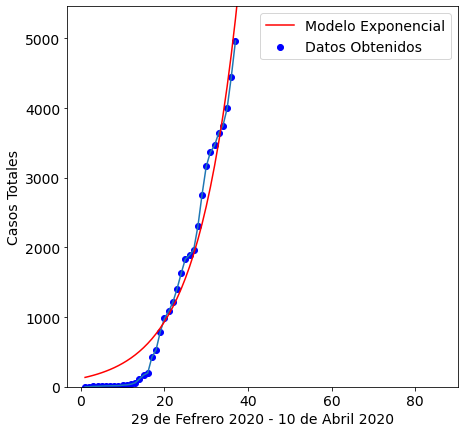

In [5]:
# Implementar
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
plt.scatter(x,y,label="Datos Obtenidos",color="blue")
plt.plot(df.loc[:,['incre']], df.loc[:,['casosT']])
plt.plot(preduccionX, [ecuacion(i,calculo[0][0],calculo[0][1]) for i in preduccionX], label="Modelo Exponencial",color="red" )
plt.legend()
plt.xlabel("29 de Fefrero 2020 - 10 de Abril 2020")
plt.ylabel("Casos Totales")
plt.ylim((min(y)*1,max(y)*1.1))
plt.show()

In [6]:
# Implementar Modelo Polinomail para realizar un prediccion 
x1= df['incre']
y1= df['casosT']
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25)
X_train=X_train.values.reshape([X_train.values.shape[0],1])
X_test=X_test.values.reshape([X_test.values.shape[0],1])


Grfica de las predicciones

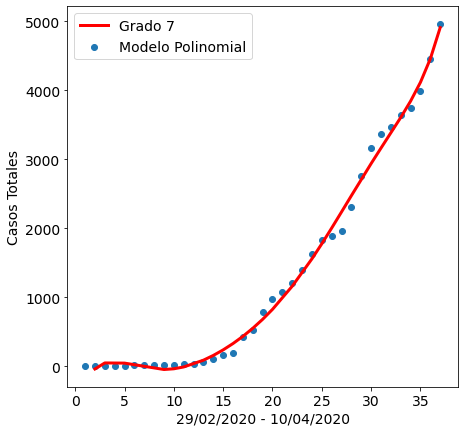

In [7]:
poli_reg=PolynomialFeatures(degree=7)
X_train_poli = poli_reg.fit_transform(X_train)
X_test_p = poli_reg.fit_transform(X_test)
pr = linear_model.LinearRegression()
pr.fit(X_train_poli, y_train)
Y_predic = pr.predict(X_train_poli)
xt,yt=zip(*sorted(zip(X_train,Y_predic)))
    
plt.xlabel("29/02/2020 - 10/04/2020")
plt.ylabel("Casos Totales")
plt.plot(xt, yt, color='red', label='Grado 7', lineWidth=3)
plt.scatter(x1,y1, label="Modelo Polinomial")
plt.legend(loc=2)
plt.show()

## Análisis
 
 En los ya realizado se puede ver que el modelo Polinomio es una manera de simular una regresión lineal en donde las relaciones de las variables independiente X y la dependiente en este caso Y se modela como un polinomio de grado n en x.
 
 Un modelo exponencial puede llegar a ser robusto ya que proporciona una precisión razonable si las condiciones no llegan a ser cumplidas


## Conclusiones

Con la aplicación de diferentes métodos en los cuales se puede realizar la estimación o ajuste a los datos, en este caso baso en un Corpus de datos de personas que han contraído el virus y con lo que se puede adquirir datos que se acerquen a lo pronosticado.


## Criterio personal (político, económico y social de la situación)

Tomando en cuenta el factor político que se tiene en el país en control de la infección es bastante baja desde un punto de vista ya que la desinformación que se presenta la falta de orden social en las personas será la primera en mostrar un declive en el país, si no se respetan las leyes impuestas en esta situación, de tal modo que es ahí donde el factor económico llega a verse comprometido no solo por parte del gobierno si no de todas las personas, ya que esperar que la vida después de que esto acabe continua de una manera normal no va a ser de ese modo, esperar que las personas tomen conciencia ya que en este punto los que no lo han hecho serán los primeros en conos las consecuencias. 



# Referencias

- https://www.researchgate.net/publication/340092755_Infeccion_del_Covid-19_en_Colombia_Una_comparacion_de_modelos_logisticos_y_exponenciales_aplicados_a_la_infeccion_por_el_virus_en_Colombia

- https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/